In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load the boston housing dataset

In [48]:
boston_data = pd.read_csv("/Users/shin/Desktop/데이터 사이언스 기초/데이터파일/boston.csv")

### Perform basic statistics to understand the data's distribution, central tendencies, and spread.

In [49]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


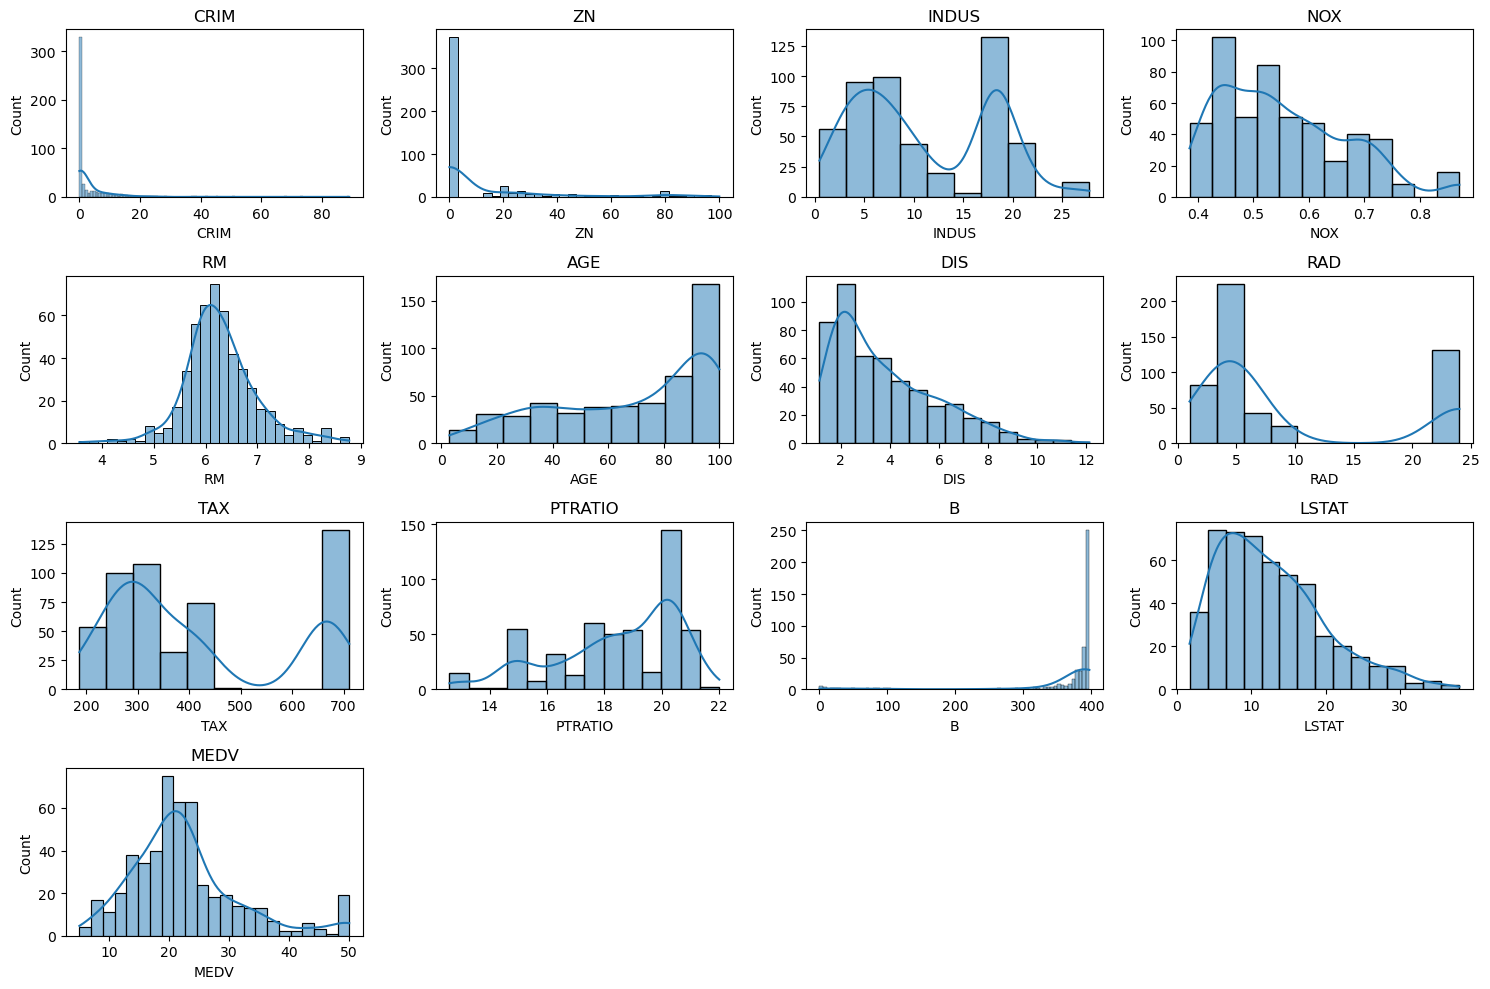

In [50]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
plt.figure(figsize = (15,10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(boston_data[feature], kde = True)
    plt.title(feature)
    plt.tight_layout()
    
plt.show()

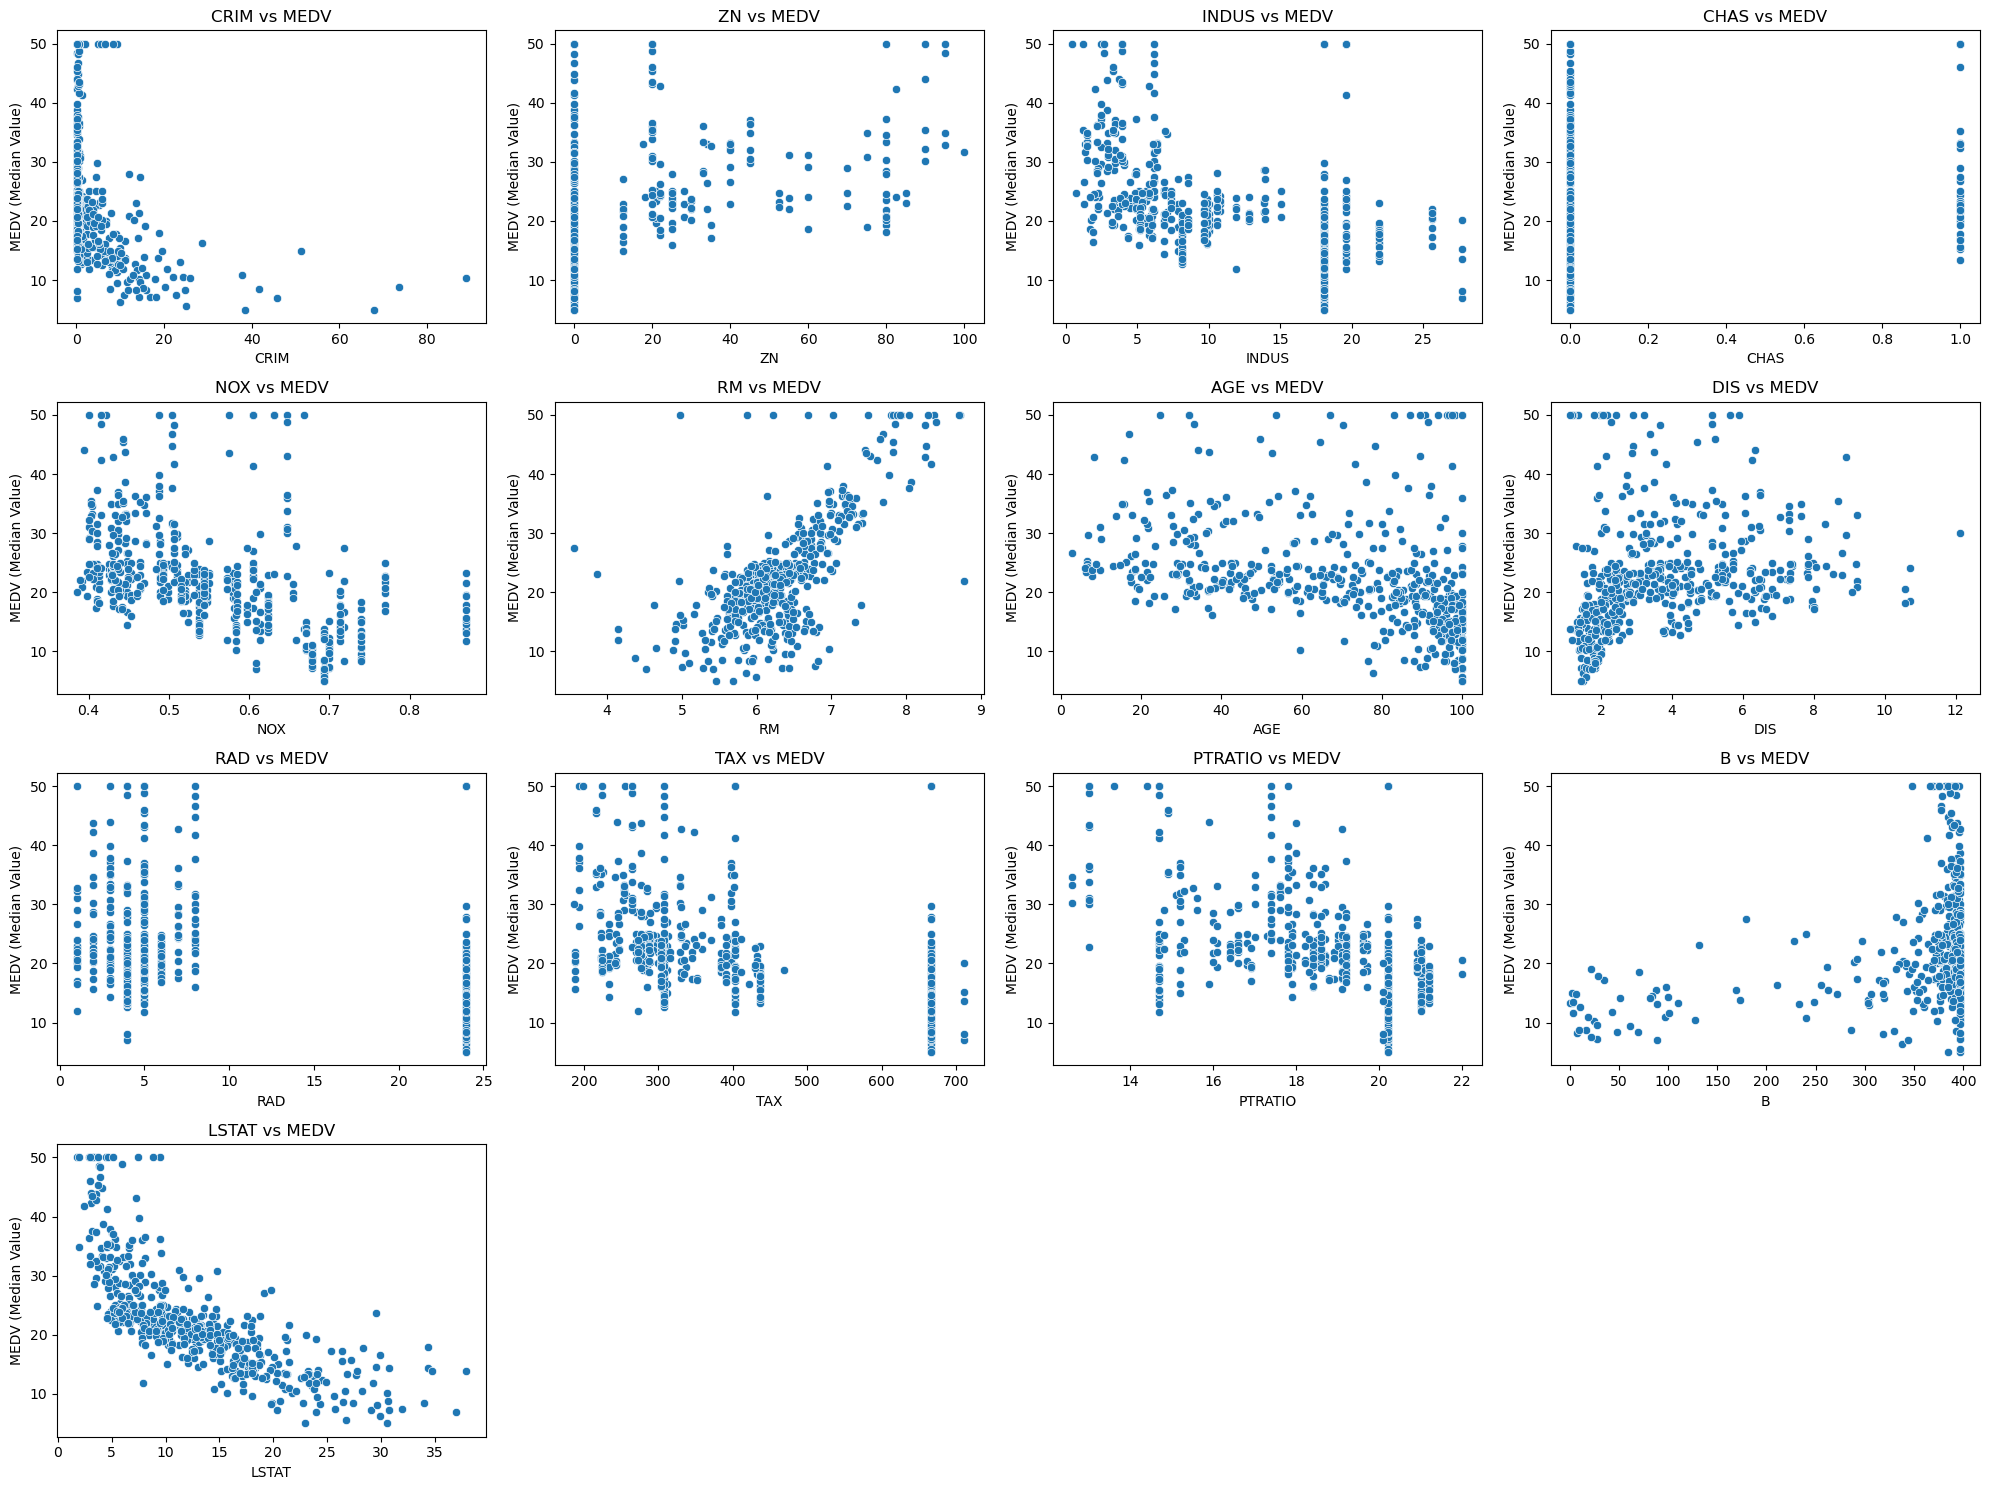

In [51]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(boston_data.columns[:-1]):  # 'MEDV'를 제외한 모든 특성에 대해 반복
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=boston_data[col], y=boston_data['MEDV'])
    plt.title(f"{col} vs MEDV")
    plt.ylabel('MEDV (Median Value)')

plt.tight_layout()
plt.show()

## insight & interpretation

'MEDV'의 값을 주위 다른 요인들과 비교하여 산점도로 분석해보았을 때 우리팀은 RM(방의 개수), LSTAT(인구 중 하위 계층 비율), DIS(보스턴 고용 센터까지의 가중 거리)에 주목했습니다. 이 세 산점도 자료를 사용하여 보스턴 사람들의 소득계층과 왜 보스턴에 이러한 사람들이 있는지를 분석해보았습니다. 첫 째로 LSTAT 산점도를 분석했을 때 대부분의 사람들이 중하위 계층에 분포된 사람이 많음을 알 수 있었으며, 이들의 집 가격은 중하위권의 집값을 가지는 곳에 살고 있습니다. 또한 DIS산점도를 통해서 주로 고용센터와 가깝고 중하위권 가격의 집에 많은 사람들이 거주하고 있음을 또한 확인할 수 있었습니다. 마지막으로 RM 산점도를 보았을 때 주로 방의 개수가 5~7개의 평균에서 그 이하의 집값을 가지는 고 살아가는 것을 확인할 수 있었습니다. 이를 통해서 중하위 계층의 사람들이 일을 하기 위해서 보스턴의 평균 5~7개의 방이 있는 집에 많이 살고 있다는 것을 위의 시각화 자료를 통해서 알 수 있었습니다. 또한 위 자료를 바탕으로 우리의 해석을 검증하기 위해서 인터넷을 통해서 이 당시(1970년도) 보스턴의 시대 상황을 찾아보았다. 그 결과 그 당시 보스턴이 재개발을 했다는 것을 알게 되었다. 이를 통해서 많은 사람들이 가족과 함께 보스턴에 일자리를 찾기 위해서 찾아왔다는 결론을 내릴 수 있었다.

## 2) Data Pre-processing:

- Check whether there is any missing value.
- Standardize the data 

In [52]:
missing_values = boston_data.isnull().sum()

missing_values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [53]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=features).head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


## 3) Model Building:

- Split the dataset into a training and testing set.
- Implement a linear regression model using the training set.
- Evaluate the model using the testing set.
- Interpret your model (Interpret the coefficients of the features)

In [55]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [56]:
X = boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = boston_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
Ir = LinearRegression()

In [58]:
Ir.fit(X_train, y_train) 

LinearRegression()

In [59]:
Ir.score(X_train, y_train) 

0.7434997532004697

In [60]:
y_pred = Ir.predict(X_test)

In [61]:
Ir.intercept_

31.63108403569415

In [62]:
Ir.coef_ 

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

- y = b0 + b1x1 + b2x2 + ... + bnxn 여기서 아래 값들은 b1부터 bn의 값을 나타냄
- 또한 각 계수의 값이 양수일 경우 해당 특성이 y의 값을 증가시키는 영향을 갖고, 음수일 경우 감소시키는 영향을 준다. 따라서 증가시키는 영향을 주는 요인은 ('ZN', 'INDUS', 'CHAS', 'RM', 'RAD', 'B')이다. 그리고 감소시키는 요인은 ('CRIM', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT')이다.
- 그리고 위 회귀 식의 y절편은 31.631을 나타낸다.

## 4) Evaluation:
- Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), andRoot Mean Squared Error (RMSE) to evaluate the model's performance on the test data.
- Visualize the difference between actual and predicted values by making a plot.

In [63]:
mean_absolute_error(y_test, y_pred)

3.162709871457385

In [64]:
mes = mean_squared_error(y_test, y_pred)
mes

21.517444231177038

In [65]:
np.sqrt(mes)

4.638689926172802

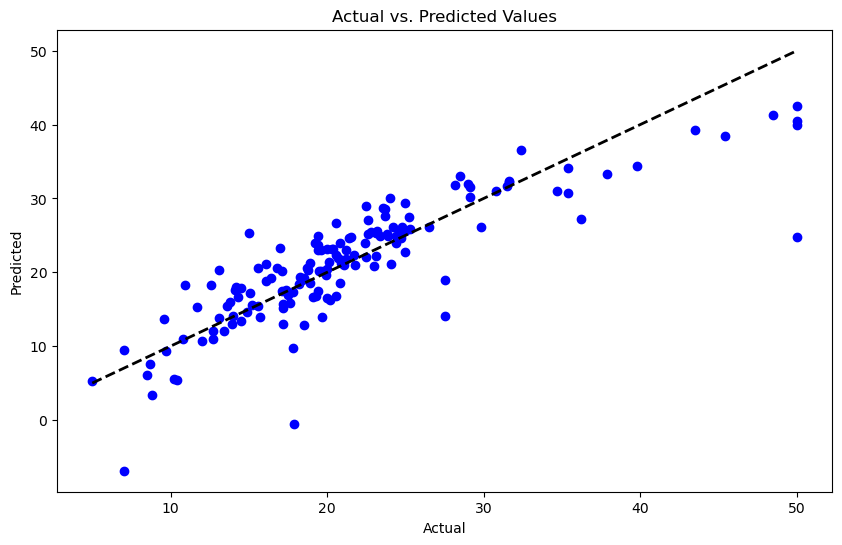

In [66]:
# Visualization of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# 5) Conclusion: 
## Q. Discuss the implications of the model and any limitations. 

1. 모델의 함의:

- 이 선형 회귀 모델은 보스턴 주택 데이터를 기반으로 주택 가격을 예측하는 데 효과적인 도구임을 보여줍니다. 특히, 위의 인사이트 부분에서 분석/보고한 것에 따라 RM(방의 개수), LSTAT(인구 중 하위 계층 비율), DIS(보스턴 고용 센터까지의 가중 거리)등이 주택 가격에 중요한 영향을 미친다.
- 이러한 결과는 부동산 개발자와 투자자가 주택 가격을 결정하는 데 있어 중요한 요소들을 고려하는 데 도움이 될 수 있다.

2. 모델의 한계점:

- 데이터셋의 크기와 범위: 사용된 데이터셋은 1970년대 보스턴 지역의 데이터로 너무 옛날의 데이터이므로, 현재 시장 상황이나 다른 지역에 대한 예측에는 한계가 있을 수 있다.
- 특성의 한계: 일부 중요한 요소들이 누락되었을 수 있으며, 예를 들어, 현재의 경제 상황, 주택의 상태, 지역의 개발 동향 등이 포함되지 않았다.
- 선형 모델의 한계: 복잡한 현실 세계의 관계를 단순한 선형 관계로 모델링하는 데는 한계가 있을 수 있다.

## Q. Suggest ways the model might be improved or refined in future work. 

모델의 개선 및 정제 할 수 있는 방안들은 여러가지가 있습니다. 그 중에서 첫번째로는 데이터 수집량을 늘리는 것입니다. 데이터 수집량을 늘림으로써 모델의 훈련에 많은 다양성과 정보를 제공 할 수 있으므로, 모델의 성능을 향상시키고 과적합을 방지 할 수 있습니다. 두 번째로는 변수를 추가하는 것입니다. 예를 들어 인프라 개발, 교통 접근성, 그 당시의 나라 경제 상황을 추가함으로써 모델의 정확도를 높일 수 있습니다. 세 번째로는 고급 모델링 기법을 적용입니다.  현재 쓰이는 단순 선형모델로는 현실 세계의 관계를 분석하기엔 한계가 있습니다. 그러므로 더 복잡한 모델인 랜덤 포레스트나 그래디언트 부스팅과 같은 앙상블 방법을 이용하여 더 복잡한 패턴과 관계를 포착 할 수 있습니다.  마지막 방안으로는 교차 검증을 이용하는것 입니다. 교차 검증인 K-Fold Cross-validation을 사용하여 데이터를 여러 번 반복하여 나누고 모델을 여러 번 훈련하고 평가하므로 단일 훈련/검증 세트만을 이용 할 시 발생하는 데이터가 제한적으로 활용되는 걸 개선할 수 있습니다.